# **Trabajo final - Aprenizaje de máquinas**

## Multiclass classification of dry beans using machine learning techniques

Equipo #4:
* Gladis Carmona Pedraza CC **43983972**
* Camila Arbeláez Vélez CC **1036959719**
* Juan Pablo Botero Aguirre CC **98714459**

# 1. Descripción del conjunto de datos

Este conjunto de datos cuenta con 13,611 instancias y 17 atributos de siete tipos diferentes de frijoles secos, tomando en cuenta las características de dimensión y estructura (12  atributos de dimensiones, 4 atributos de forma de los granos y 1 de clase).


Información de los atributos:
* 1. **Área (A):** el área de una zona de fríjoles y el número de pixeles dentro de sus límites.
* 2. **Perímetro (P):** La circunferencia del frijol se define como la longitud de su borde.
* 3. **Longitud del eje mayor (L):** la distancia entre los extremos de la línea más larga que se puede dibujar de un frijol.
* 4. **Longitud del eje menor (l):** la línea más larga que se puede trazar desde el frijol estando perpendicular al eje principal.
* 5. **Relación de aspecto (K):** define la relación entre L y l.
* 6. **Excentricidad (Ec):** Excentricidad de la elipse que tiene los mismos momentos que la región.
* 7. **Área convexa (C):** número de píxeles en el polígono convexo más pequeño que puede contener el área de una semilla de frijol.
* 8. **Diámetro equivalente (Ed):** El diámetro de un círculo que tiene la misma área que el área de una semilla de frijol.
* 9. **Extensión (Ex):** la relación entre los píxeles del cuadro delimitador y el área del frijol.
* 10. **Solidez (S):** También conocida como convexidad. La relación entre los píxeles de la cáscara convexa y los que se encuentran en los frijoles.
* 11. **Redondez (R):** Calculado con la siguiente fórmula: (4piA)/(P^2)
* 12. **Compacidad (CO):** mide la redondez de un objeto: Ed/L
* 13. **ShapeFactor1 (SF1)**
* 14. **ShapeFactor2 (SF2)**
* 15. **ShapeFactor3 (SF3)**
* 16. **ShapeFactor4 (SF4)**
* 17. **Clase** (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz y Sira)

Las clases de granos se muestra a continuación:

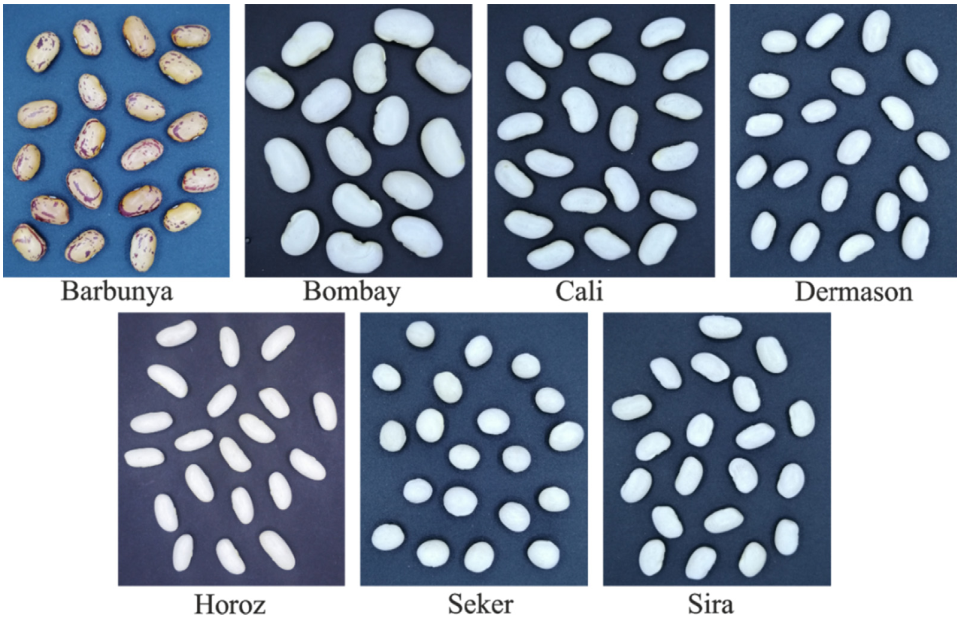

**Referencias:**

KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507.
DOI: https://doi.org/10.1016/j.compag.2020.105507

Dataset disponible en:
https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

# 2. Objetivo:
Clasificar los granos en una de las siete clases

# 3. Análisis exploratorio de los datos

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Cargar el conjunto de datos
df = pd.read_excel('/Users/JP/Documents/GitHub/Aprendizaje_maquinas/Trabajo_final_ML/DryBeanDataset/Dry_Bean_Dataset.xlsx')
# Verificar la carga
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
# Dimensiones del conjunto de datos:
print("El dataset contiene {} filas y {} columnas".format(df.shape[0], df.shape[1]))

El dataset contiene 13611 filas y 17 columnas


In [4]:
# Descripción de los atributos, NaN y tipo de datos:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

## 3.1 Análisis univariado

In [5]:
# Descripción de las variables cuantitativas
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [4]:
# Codificación de la clase de fríjol y adición al dataset
df['Class_number'] = [1 if x == 'SEKER' else 
                      2 if x == 'BARBUNYA' else
                      3 if x == 'BOMBAY' else
                      4 if x == 'CALI' else
                      5 if x == 'DERMASON' else
                      6 if x == 'HOROZ' else
                      7 for x in df['Class']]

In [7]:
print("El dataset contiene {} filas y {} columnas".format(df.shape[0], df.shape[1]))

El dataset contiene 13611 filas y 18 columnas


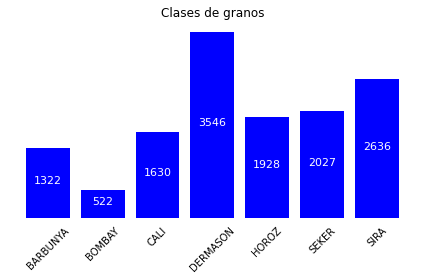

In [8]:
# Conteo de la variable cualitativa (Clase)

x_bar = ['BARBUNYA', 'BOMBAY', 'CALI',
    'DERMASON','HOROZ','SEKER',
    'SIRA']
y_bar = df.groupby('Class')['Class'].count()
bars = plt.bar(x_bar, y_bar, align='center', linewidth=0, color='blue')
plt.title('Clases de granos');

x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2 , bar.get_height()/2 - 5, str(int(bar.get_height())), 
                 ha='center', color='w', fontsize=11)

plt.tight_layout();

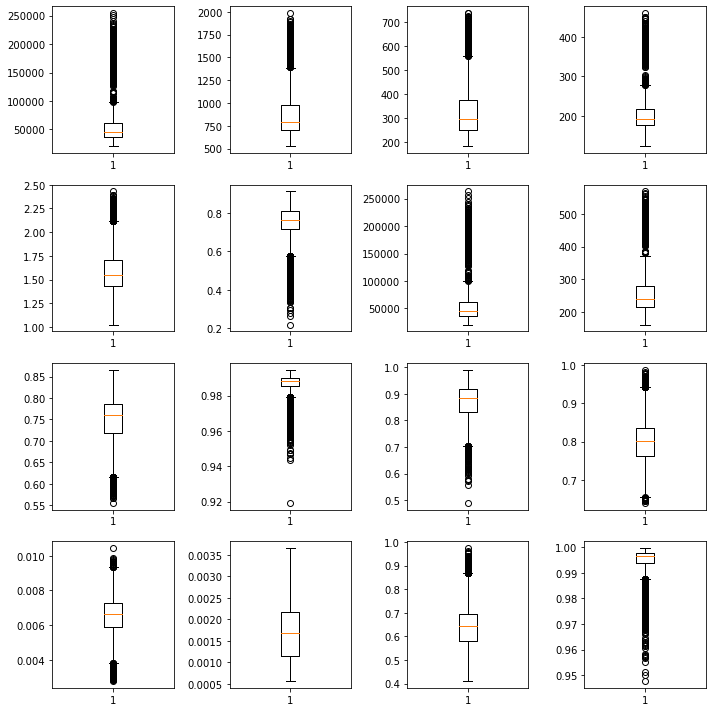

In [9]:
# Gráfico de cajas y bigotes con outliers

fig, ax = plt.subplots(4,4, figsize=(10,10))

ax[0,0].boxplot(df.Area)
ax[0,1].boxplot(df.Perimeter)
ax[0,2].boxplot(df.MajorAxisLength)
ax[0,3].boxplot(df.MinorAxisLength)
ax[1,0].boxplot(df.AspectRation)
ax[1,1].boxplot(df.Eccentricity)
ax[1,2].boxplot(df.ConvexArea)
ax[1,3].boxplot(df.EquivDiameter)
ax[2,0].boxplot(df.Extent)
ax[2,1].boxplot(df.Solidity)
ax[2,2].boxplot(df.roundness)
ax[2,3].boxplot(df.Compactness)
ax[3,0].boxplot(df.ShapeFactor1)
ax[3,1].boxplot(df.ShapeFactor2)
ax[3,2].boxplot(df.ShapeFactor3)
ax[3,3].boxplot(df.ShapeFactor4)

plt.tight_layout()
plt.show();

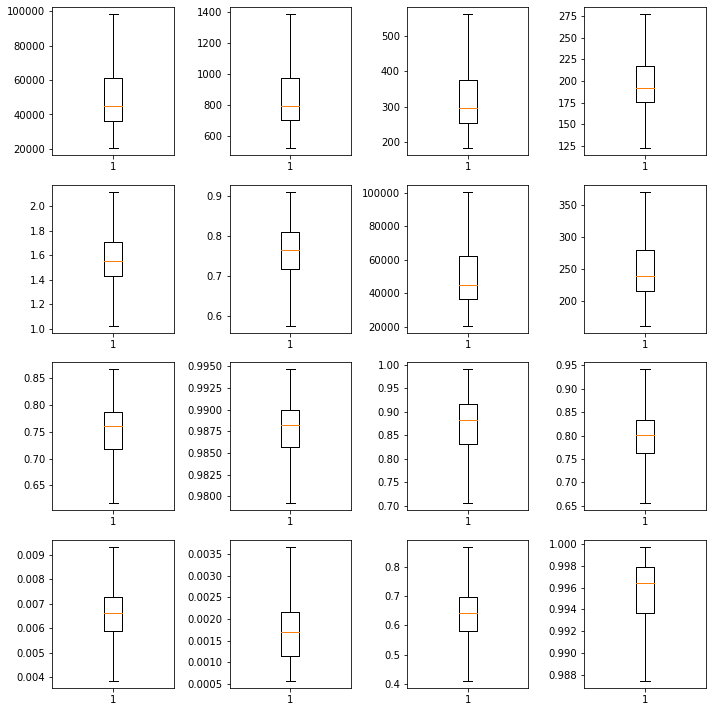

In [10]:
# Gráfico de cajas y bigotes sin outliers

fig, ax = plt.subplots(4,4, figsize=(10,10))

ax[0,0].boxplot(df.Area, sym='')
ax[0,1].boxplot(df.Perimeter, sym='')
ax[0,2].boxplot(df.MajorAxisLength, sym='')
ax[0,3].boxplot(df.MinorAxisLength, sym='')
ax[1,0].boxplot(df.AspectRation, sym='')
ax[1,1].boxplot(df.Eccentricity, sym='')
ax[1,2].boxplot(df.ConvexArea, sym='')
ax[1,3].boxplot(df.EquivDiameter, sym='')
ax[2,0].boxplot(df.Extent, sym='')
ax[2,1].boxplot(df.Solidity, sym='')
ax[2,2].boxplot(df.roundness, sym='')
ax[2,3].boxplot(df.Compactness, sym='')
ax[3,0].boxplot(df.ShapeFactor1, sym='')
ax[3,1].boxplot(df.ShapeFactor2, sym='')
ax[3,2].boxplot(df.ShapeFactor3, sym='')
ax[3,3].boxplot(df.ShapeFactor4, sym='')

plt.tight_layout()
plt.show();

# 3.2 Análisis bivariado

In [11]:
%matplotlib notebook
# plotting a scatter matrix
from matplotlib import cm
from pandas.plotting import scatter_matrix

X = df[df.columns[:-2]]
y = df['Class_number']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('YlGnBu')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(16,10), cmap=cmap)

<IPython.core.display.Javascript object>

La matriz de correlación evidencia algunas instancias con alta corelación, ya sea positiva o negativa. Debido al número de instancias, no es fácil de visualizar y se complementa con una matriz de correlación y un gráfico heatmap

In [12]:
# Matriz de correlación heatmap
corr_matrix = X.corr()
fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(X.corr(), annot=True, cmap="YlGnBu");

<IPython.core.display.Javascript object>

Análisis de la matriz de correlación:
xxxxxx
xxxxxx

In [13]:
# scatter plot en 3D de variables seleccionadas
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['Area'], X_train['Compactness'], X_train['Extent'], c = y_train, marker = 'o', s=1)
ax.set_xlabel('Area')
ax.set_ylabel('Compactness')
ax.set_zlabel('Extent')
plt.show()

<IPython.core.display.Javascript object>

# 4. Algoritmos de machine learning

In [5]:
# Selección de las instancias y de la clase para clasificación
X = df[df.columns[:-2]]
y = df['Class_number']
# Partición 75% / 25% train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Ensayar con otros test_size=None

## 4.1 Decision tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
decision_tree = DecisionTreeClassifier(
criterion='gini', splitter='best').fit(X_train, y_train)
print('La exactitud del modelo en el conjunto de entrenamiento es: {:.2f}'
     .format(decision_tree.score(X_train, y_train)))
print('La exactitud del modelo en el conjunto de prueba es: {:.2f}'
     .format(decision_tree.score(X_test, y_test)))

La exactitud del modelo en el conjunto de entrenamiento es: 1.00
La exactitud del modelo en el conjunto de prueba es: 0.89


La exactitud de 100% en el conjunto de entrenamiento evidencia un sobrejuste del modelo; para evitar esto se deben modificar los parámetros del modelo. A continuacuión se modificadrá el max_depth del árbol y se mantienen los parámetros criterion = 'gini'y splitter = 'best'.

In [7]:
# Setting max decision tree depth to help avoid overfitting
decision_tree2 = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth = 4).fit(X_train, y_train)

print('La exactitud del modelo en el conjunto de entrenamiento es: {:.2f}'
     .format(decision_tree2.score(X_train, y_train)))
print('La exactitud del modelo en el conjunto de prueba es: {:.2f}'
     .format(decision_tree2.score(X_test, y_test)))

La exactitud del modelo en el conjunto de entrenamiento es: 0.83
La exactitud del modelo en el conjunto de prueba es: 0.83


In [18]:
from sklearn.metrics import plot_confusion_matrix

In [19]:
plot_confusion_matrix(decision_tree2,
                      X_test,
                      y_test, cmap='viridis',
                     display_labels=df['Class'].unique(),
                     xticks_rotation='vertical');
plt.tight_layout()

<IPython.core.display.Javascript object>

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
tree_predicted = decision_tree2.predict(X_test)

In [22]:
print(classification_report(y_test, tree_predicted))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94       470
           2       0.00      0.00      0.00       319
           3       1.00      1.00      1.00       111
           4       0.55      0.98      0.70       419
           5       0.89      0.94      0.91       905
           6       0.99      0.87      0.93       491
           7       0.84      0.84      0.84       688

    accuracy                           0.83      3403
   macro avg       0.74      0.80      0.76      3403
weighted avg       0.78      0.83      0.80      3403



/Users/JP/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
a = plot_tree(decision_tree2,
              feature_names=df.columns,
              class_names=df['Class'].unique(),
              filled=True,
              rounded=True,
              fontsize=4)

<IPython.core.display.Javascript object>

In [19]:
import graphviz
from sklearn import tree

In [27]:
dot_data = tree.export_graphviz(decision_tree2, out_file=None, 
                                feature_names=df.columns[:-2],
                                class_names=df['Class'].unique(),
                                filled=True)

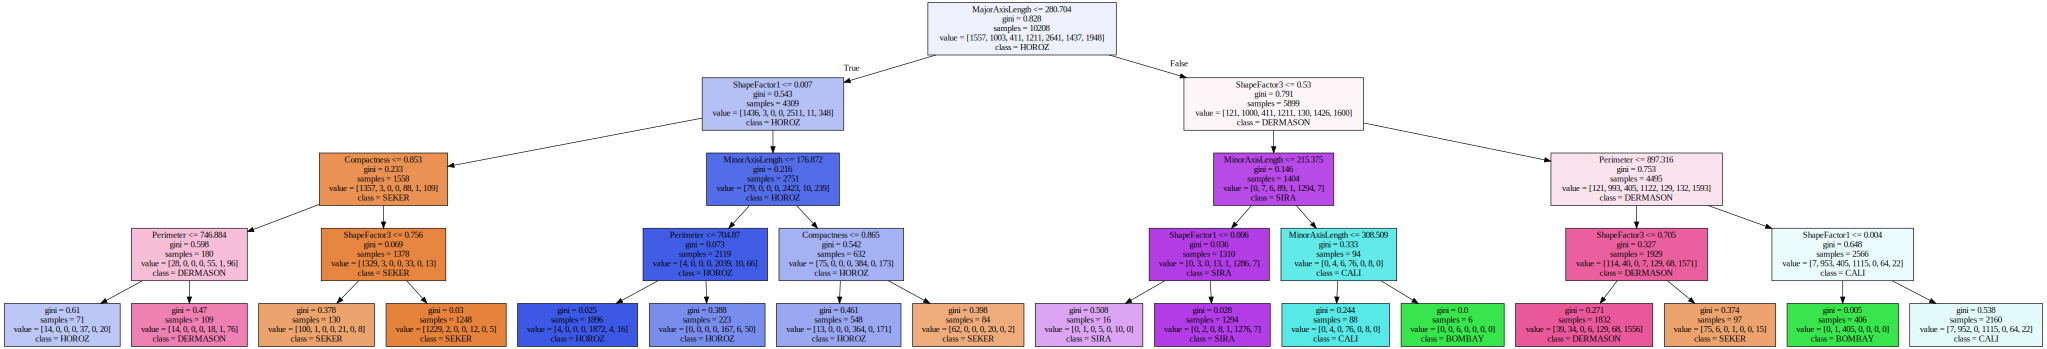

In [28]:
graph = graphviz.Source(dot_data, format="png")
graph

In [22]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

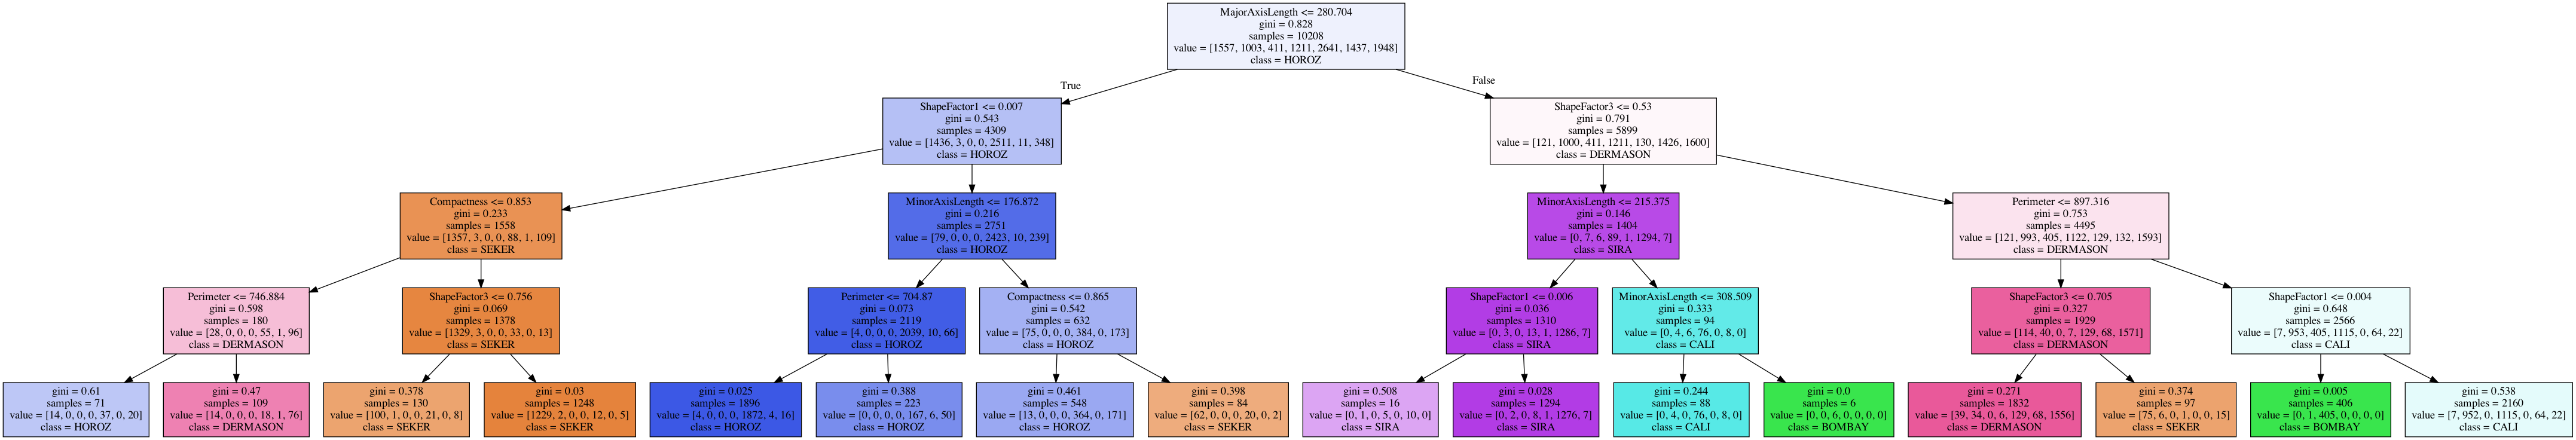

## 4.2 Random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
from sklearn.metrics import accuracy_score
y_predict_rf = random_forest.predict(X_test)
acc_score_rf = accuracy_score(y_test, y_predict_rf)
acc_score_rf

0.9247722597707905

In [27]:
plot_confusion_matrix(random_forest,
                      X_test,
                      y_test, cmap='viridis',
                     display_labels=df['Class'].unique(),
                     xticks_rotation='vertical')
plt.tight_layout();

<IPython.core.display.Javascript object>

In [28]:
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           1       0.95      0.96      0.95       470
           2       0.95      0.91      0.93       319
           3       1.00      0.99      1.00       111
           4       0.94      0.94      0.94       419
           5       0.91      0.95      0.93       905
           6       0.96      0.95      0.96       491
           7       0.89      0.86      0.87       688

    accuracy                           0.93      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403



## 4.3 K-Nearest-Neighbor

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
acc_score_knn = knn.score(X_test, y_test)
acc_score_knn

0.7387599177196591

In [31]:
y_pred_knn = knn.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.79      0.71      0.75       470
           2       0.46      0.48      0.47       319
           3       1.00      0.99      1.00       111
           4       0.65      0.62      0.63       419
           5       0.85      0.87      0.86       905
           6       0.76      0.73      0.74       491
           7       0.69      0.76      0.72       688

    accuracy                           0.74      3403
   macro avg       0.74      0.73      0.74      3403
weighted avg       0.74      0.74      0.74      3403



In [33]:
plot_confusion_matrix(knn,
                      X_test,
                      y_test);

<IPython.core.display.Javascript object>

### Precisión del clasificadro knn según el parámetro k

In [34]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.axhline(y=scores[5], xmin=0, xmax=0.25, c='r', ls='--')
plt.axvline(x=5, ymin=0, ymax=scores[4], c='r', ls='--')
plt.xticks([0,5,10,15,20]);

<IPython.core.display.Javascript object>

## 4.4 Support Vector Machines

In [35]:
from sklearn.svm import SVC
svm_l = SVC(kernel = 'linear').fit(X_train, y_train)

print('Accuracy of SVC on training set: {:.2f}'
     .format(svm_l.score(X_train, y_train)))
print('Accuracy of  SVC on test set: {:.2f}'
     .format(svm_l.score(X_test, y_test)))

Accuracy of SVC on training set: 0.92
Accuracy of  SVC on test set: 0.92


In [36]:
y_pred_smv_l = svm_l.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred_smv_l))

              precision    recall  f1-score   support

           1       0.94      0.95      0.94       470
           2       0.95      0.87      0.91       319
           3       1.00      0.99      1.00       111
           4       0.91      0.95      0.93       419
           5       0.91      0.93      0.92       905
           6       0.94      0.94      0.94       491
           7       0.86      0.84      0.85       688

    accuracy                           0.92      3403
   macro avg       0.93      0.92      0.93      3403
weighted avg       0.92      0.92      0.92      3403



In [38]:
plot_confusion_matrix(svm_l,
                      X_test,
                      y_test);

<IPython.core.display.Javascript object>

# Reducción de la dimensionalidad

## Análisis de componentes principales (PCA)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X.shape, X_pca.shape)

(13611, 16) (13611, 2)


In [41]:
# gráfico de varianza explicada y escoger componentes

In [42]:
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y, s=2, palette='viridis');


/Users/JP/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [43]:
from sklearn.dummy import DummyClassifier

dummy_stra = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)

y_dummy_predictions = dummy_stra.predict(X_test)

y_dummy_predictions

array([3, 7, 6, ..., 5, 5, 2])

In [44]:
dummy_stra.score(X_test, y_test)

0.1674992653540993

In [45]:
plot_confusion_matrix(dummy_stra,
                      X_test,
                      y_test);

<IPython.core.display.Javascript object>

## Normalización de datos

In [46]:
X_normalized = StandardScaler().fit(X_train).transform(X_train)

In [47]:
random_forest_normalized = RandomForestClassifier()
random_forest_normalized.fit(X_normalized, y_train)

RandomForestClassifier()

In [48]:
X_test_normalized = StandardScaler().fit(X_test).transform(X_test)

In [49]:
y_predict_rf_norm = random_forest.predict(X_test_normalized)
acc_score_rf_norm = accuracy_score(y_test, y_predict_rf)
acc_score_rf_norm

0.9285924184543051

In [50]:
from sklearn.svm import SVC
svm_l_norm = SVC(kernel = 'linear').fit(X_normalized, y_train)

print('Accuracy of SVC on training set: {:.2f}'
     .format(svm_l_norm.score(X_normalized, y_train)))
print('Accuracy of  SVC on test set: {:.2f}'
     .format(svm_l_norm.score(X_test_normalized, y_test)))

Accuracy of SVC on training set: 0.93
Accuracy of  SVC on test set: 0.93


In [51]:
knn_norm = KNeighborsClassifier(n_neighbors = 5)
knn_norm.fit(X_normalized, y_train)

KNeighborsClassifier()

In [52]:
acc_score_knn_norm = knn_norm.score(X_test_normalized, y_test)
acc_score_knn_norm

0.9244784014105202

In [53]:
y_pred_knn_norm = knn_norm.predict(X_test_normalized)

In [54]:
print(classification_report(y_test, y_pred_knn_norm))

              precision    recall  f1-score   support

           1       0.93      0.96      0.94       470
           2       0.94      0.91      0.93       319
           3       1.00      1.00      1.00       111
           4       0.92      0.95      0.94       419
           5       0.92      0.92      0.92       905
           6       0.96      0.95      0.95       491
           7       0.88      0.86      0.87       688

    accuracy                           0.92      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.92      0.92      0.92      3403



### Cross-validation


In [58]:
from sklearn.model_selection import StratifiedKFold
cv= StratifiedKFold(n_splits=5, shuffle=True)
cv
# como los datos estan ordenados se requiere estratificar el cv

StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# accuracy is the default scoring metric
acc_cv_dt = cross_val_score(decision_tree2, X, y, cv=cv, scoring='accuracy')
print('Cross-validation (accuracy)', acc_cv_dt.mean())

Cross-validation (accuracy) 0.8237448809404635


In [60]:
acc_cv_rf = cross_val_score(random_forest, X, y, cv=cv, scoring='accuracy')
print('Cross-validation (accuracy)', acc_cv_rf.mean())

Cross-validation (accuracy) 0.9218276671659467


In [ ]:
# Análisis de cross-validation

## Diferente partición train/test

In [5]:
# Partición entrenamiento/prueba 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
decision_tree3 = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth = 4).fit(X_train, y_train)

print('La exactitud del modelo en el conjunto de entrenamiento es: {:.2f}'
     .format(decision_tree3.score(X_train, y_train)))
print('La exactitud del modelo en el conjunto de prueba es: {:.2f}'
     .format(decision_tree3.score(X_test, y_test)))

La exactitud del modelo en el conjunto de entrenamiento es: 0.83
La exactitud del modelo en el conjunto de prueba es: 0.83


In [58]:
random_forest2 = RandomForestClassifier()
random_forest2.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
from sklearn.metrics import accuracy_score
y_predict_rf2 = random_forest2.predict(X_test)
acc_score_rf2 = accuracy_score(y_test, y_predict_rf2)
acc_score_rf2

0.9265785609397944

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(n_neighbors = 1)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
acc_score_knn2 = knn2.score(X_test, y_test)
acc_score_knn2

0.7289422135161606

In [9]:
from sklearn.svm import SVC
svm_l2 = SVC(kernel = 'linear').fit(X_train, y_train)

print('Accuracy of SVC on training set: {:.2f}'
     .format(svm_l2.score(X_train, y_train)))
print('Accuracy of  SVC on test set: {:.2f}'
     .format(svm_l2.score(X_test, y_test)))

Accuracy of SVC on training set: 0.92
Accuracy of  SVC on test set: 0.92


In [ ]:
# Análisis de efecto de la partición 70/30